# Plotting Phase fraction vs T

## Libraries

In [59]:
from pycalphad import Database, equilibrium, variables as v
import matplotlib.pyplot as plt
import numpy as np
from pycalphad.plot.utils import phase_legend

### Defining file paths for database

In [150]:
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\Copper\\'
# dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'

### Load database

In [156]:
# dbf = Database(dbf_diretory + 'steel_database_fix.tdb') #Steel database 
# dbf = Database(dbf_diretory + 'Qiu_(2020)_calpha_101734_CuCrNi.tdb')
dbf = Database(dbf_diretory + 'Cu-Cr-Zr-Ni_Test3.tdb')



### Determine phases

In [157]:
phases = list(dbf.phases.keys())
# phases = ['LIQUID', 'FCC_A1', 'BCC_A2', 'HCP_A3',
           # 'CU5ZR_C15B', 'CU9ZR2', 'CU51ZR14', 'CU8ZR3', 'CU10ZR7', 'CUZR', 'CUZR2', 'C14_LAVES', 'C15_LAVES', 'C36_LAVES'] #For CuCrZr
print(phases)

['CBCC_A12', 'LIQUID', 'FCC_A1', 'BCC_A2', 'HCP_A3', 'NI7ZR2', 'NI3ZR', 'NI21ZR8', 'NI10ZR7', 'NI11ZR9', 'NIZR', 'ZR2NI', 'NI5ZR', 'CU5ZR_C15B', 'CU9ZR2', 'CU51ZR14', 'CU8ZR3', 'CU10ZR7', 'CUZR', 'CUZR2', 'C14_LAVES', 'C15_LAVES', 'C36_LAVES', 'DIAMOND_A4', 'CU33SI7_A13', 'CU33SI7_HT', 'CU15SI4_D86', 'CU3SI_LT', 'CU3SI_MT', 'CU3SI_HT']


In [158]:
# mass_fracs = {v.W('NI'): 3/100, 
#               v.W('CR'): 0.8/100, 
#               v.W('SI'): 0.8/100,
                            # }

mass_fracs = {v.W('NI'): 3/100, 
              v.W('CR'): 0.8/100}
# mass_fracs = {v.W('CR'): 1/100}                           

conds = v.get_mole_fractions(mass_fracs, 'CU', dbf)

conds[v.T] = (1200.15, 1773.15, 0.5) # Kelvin
conds[v.P] = 1e5 # Pa
conds[v.N] = 1

# eq = equilibrium(dbf, ['CU', 'CR','NI', 'SI','VA'], phases, conds)
eq = equilibrium(dbf, ['CU', 'CR','NI','VA'], phases, conds)


print(eq)

<xarray.Dataset> Size: 578kB
Dimensions:    (N: 1, P: 1, T: 1146, X_CR: 1, X_NI: 1, vertex: 4, component: 3,
                internal_dof: 5)
Coordinates:
  * N          (N) float64 8B 1.0
  * P          (P) float64 8B 1e+05
  * T          (T) float64 9kB 1.2e+03 1.201e+03 ... 1.772e+03 1.773e+03
  * X_CR       (X_CR) float64 8B 0.009736
  * X_NI       (X_NI) float64 8B 0.03234
  * vertex     (vertex) int64 32B 0 1 2 3
  * component  (component) <U2 24B 'CR' 'CU' 'NI'
Dimensions without coordinates: internal_dof
Data variables:
    NP         (N, P, T, X_CR, X_NI, vertex) float64 37kB 0.006208 ... nan
    GM         (N, P, T, X_CR, X_NI) float64 9kB -6.086e+04 ... -1.098e+05
    MU         (N, P, T, X_CR, X_NI, component) float64 28kB -4.86e+04 ... -1...
    X          (N, P, T, X_CR, X_NI, vertex, component) float64 110kB 0.9936 ...
    Y          (N, P, T, X_CR, X_NI, vertex, internal_dof) float64 183kB 0.99...
    Phase      (N, P, T, X_CR, X_NI, vertex) <U11 202kB 'BCC_A2' 'FCC_A1'

In [159]:
phases = sorted(set(eq.Phase.values.flatten()) - {''})
phase_handles, phasemap = phase_legend(phases)
print (phases)

[np.str_('BCC_A2'), np.str_('FCC_A1'), np.str_('LIQUID')]


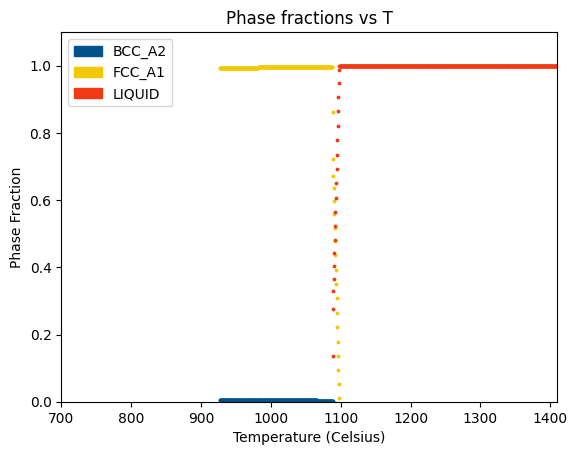

In [160]:
plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((973.15-273.15, 1683.15-273.15))

for name in phases:
    plt.scatter(eq.T.broadcast_like(eq.NP)-273.15, eq.NP.where(eq.Phase == name), color=phasemap[name], s=3)
plt.gca().legend(phase_handles, phases, loc='upper left')

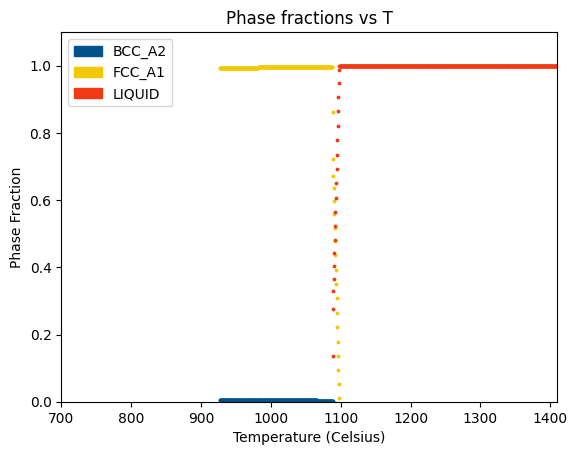

In [161]:
# Safely extract element symbol from pycalphad Variable
def get_element_name(var):
    if hasattr(var, "args") and len(var.args) > 0:
        first_arg = var.args[0]
        if hasattr(first_arg, "name"):
            return first_arg.name
        else:
            return str(first_arg)
    return str(var)

# Convert mass_fracs to string with wt%, sorted alphabetically by element
comp_str = "_".join(
    f"{get_element_name(key)}{val*100:.2f}wtpct"
    for key, val in sorted(mass_fracs.items(), key=lambda x: get_element_name(x[0]))
)
filename = f"phase_fractions_vs_T_{comp_str}.png"

plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0, 1.1))
plt.gca().set_xlim((973.15-273.15, 1683.15-273.15))

for name in phases:
    plt.scatter(eq.T.broadcast_like(eq.NP) - 273.15,
                eq.NP.where(eq.Phase == name),
                color=phasemap[name], s=3)

plt.gca().legend(phase_handles, phases, loc='upper left')

# Save figure with composition in filename
# plt.savefig(filename, dpi=300, bbox_inches='tight')
# print(f"Saved plot as {filename}")


In [103]:
# for T in eq.T.values:
#     phases_at_T = eq.Phase.sel(T=T).values
#     # Flatten and turn into strings
#     phase_names = set(str(p) for p in phases_at_T.flatten())
#     print(f"{T:.2f} K: {phase_names}")


In [101]:
# for T in eq.T.values:
#     phases_at_T = eq.Phase.sel(T=T).values
#     phase_names = [str(p) for p in phases_at_T.flatten()]
    
#     # Count number of vertices that are "LIQUID"
#     liquid_vertices = [i for i, name in enumerate(phase_names) if name == 'LIQUID']
    
#     if len(liquid_vertices) > 1:
#         print(f"T = {T:.2f} K ({T-273.15:.1f} °C) has {len(liquid_vertices)} liquid compositions")
        
#         # Get compositions for each vertex
#         for v_idx in liquid_vertices:
#             comp = {el: float(eq.X.isel(vertex=v_idx, T=[list(eq.T.values).index(T)], component=i).values)
#                     for i, el in enumerate(eq.component.values)}
#             print(f"  Vertex {v_idx}: {comp}")


In [134]:
components = ['CU', 'NI', 'CR', 'SI']
# components = ['CU', 'CR']

rows = []

for t_idx, T in enumerate(eq.T.values):
    # loop over all vertices (from 0 to eq.X.sizes['vertex']-1)
    for lv in range(eq.X.sizes['vertex']):
        # check if this vertex has a liquid fraction
        frac = eq.NP.isel(T=t_idx, vertex=lv).item()
        if frac > 1e-6:  # small tolerance to ignore zero fractions
            row = {'T_K': T, 'T_C': T-273.15, 'vertex': lv, 'fraction': frac}
            for i, comp in enumerate(components):
                row[comp] = eq.X.isel(T=t_idx, vertex=lv, component=i).item()
            rows.append(row)

import pandas as pd
df = pd.DataFrame(rows)
df.to_csv('liquid_vertices.csv', index=False)
print(df.head())


       T_K    T_C  vertex  fraction        CU        NI        CR        SI
0  1200.15  927.0       0  0.006719  0.991671  0.000238  0.008071  0.000021
1  1200.15  927.0       1  0.993281  0.002996  0.946855  0.032184  0.017965
2  1200.65  927.5       0  0.006713  0.991651  0.000239  0.008090  0.000021
3  1200.65  927.5       1  0.993287  0.003002  0.946849  0.032184  0.017965
4  1201.15  928.0       0  0.006706  0.991631  0.000240  0.008108  0.000021


### Extracting solute concentration in FCCA_1

### Export data to excel

In [135]:
import pandas as pd
import numpy as np

T_arr = eq.T.broadcast_like(eq.NP).values - 273.15  # Celsius
phase_arr = eq.Phase.values
frac_arr = eq.NP.values

unique_phases = sorted(set(phase_arr.flatten()) - {''})
data = {"Temperature (°C)": np.unique(T_arr)}

for ph in unique_phases:
    fractions = []
    for T in data["Temperature (°C)"]:
        mask = (T_arr == T) & (phase_arr == ph)
        if np.any(mask):
            fractions.append(frac_arr[mask].max())  # take max fraction at this T
        else:
            fractions.append(0)
    data[ph] = fractions

df = pd.DataFrame(data)
df["Sum of Phases"] = df[unique_phases].sum(axis=1)
df.to_excel("phase_fractions_Cu_Celcius.xlsx", index=False)

In [136]:
import pandas as pd
import numpy as np

# Broadcasted arrays
T_arr = eq.T.broadcast_like(eq.NP).values - 273.15  # Temperature in °C
phase_arr = eq.Phase.values
frac_arr = eq.NP.values

# Flatten everything
T_flat = T_arr.flatten()
phase_flat = phase_arr.flatten()
frac_flat = frac_arr.flatten()

# Create DataFrame with all points
df_points = pd.DataFrame({
    "Temperature (°C)": T_flat,
    "Phase": phase_flat,
    "Fraction": frac_flat
})

# Remove empty phase names
df_points = df_points[df_points["Phase"] != ""]

# --- Save all points for plotting ---
df_points.to_excel("phase_fractions_all_points.xlsx", index=False)

# --- Consolidate fractions per phase per temperature ---
unique_phases = sorted(set(phase_flat) - {''})
df_total = pd.DataFrame({"Temperature (°C)": np.unique(T_flat)})

for ph in unique_phases:
    # sum all sub-fractions of this phase at each T
    sums = df_points[df_points["Phase"] == ph].groupby("Temperature (°C)")["Fraction"].sum()
    # align with df_total temperature column
    df_total[ph] = df_total["Temperature (°C)"].map(sums).fillna(0)

# Add total sum of all phases
df_total["Sum of Phases"] = df_total[unique_phases].sum(axis=1)

# Save consolidated table
df_total.to_excel("phase_fractions_total_per_phase.xlsx", index=False)

print("Export complete: all points + consolidated totals.")


Export complete: all points + consolidated totals.
